<style>
.wzor {
  /* width: auto; */
  /* padding: auto; */
  border: 0.5rem solid gray;
  /* margin: 0; */
  background-color: lightgray;
}
</style>


# Modele analizy danych

### 2024/2025, semestr zimowy
Tomasz Rodak

---

## Literatura
   1. James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor,
      J. (2023). An Introduction to Statistical Learning: With
      Applications in Python.
      
      [ISLP](https://www.statlearning.com/)
   
   2. Bishop, C. M., & Nasrabadi, N. M. (2006). Pattern recognition and
      machine learning (Vol. 4, No. 4, p. 738). New York: springer. 
   
      [PRML](https://www.microsoft.com/en-us/research/people/cmbishop/prml-book/)
   
   3. Kroese, D. P., Botev, Z., Taimre, T., & Vaisman, R. (2019). Data
      science and machine learning: mathematical and statistical
      methods. CRC Press.
   
      [https://people.smp.uq.edu.au/DirkKroese/DSML/](https://people.smp.uq.edu.au/DirkKroese/DSML/)
   
   4. Hastie, T., Tibshirani, R., Friedman, J. H., & Friedman,
      J. H. (2009). The elements of statistical learning: data mining,
      inference, and prediction (Vol. 2, pp. 1-758). New York:
      springer.
   
      [https://hastie.su.domains/ElemStatLearn/](https://hastie.su.domains/ElemStatLearn/)
   
   5. Murphy, K. P. (2022). Probabilistic machine learning: an
      introduction. MIT press.
   
      [https://probml.github.io/pml-book/book1.html](https://probml.github.io/pml-book/book1.html)
   
   6. Murphy, K. P. (2023). Probabilistic machine learning: Advanced
      topics. MIT press.
   
      [https://probml.github.io/pml-book/book2.html](https://probml.github.io/pml-book/book2.html)
   
   7. Bishop, C. M., & Bishop, H (2024). Deep learning. Springer.
   
      [https://www.bishopbook.com/](https://www.bishopbook.com/)
   
   8. Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT press.
   
      [https://www.deeplearningbook.org/](https://www.deeplearningbook.org/)

---

## Wykład III

ISLP, rozdz. 3.2

---

## Regresja liniowa wielokrotna

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm
from scipy import stats

advertising = pd.read_csv('datasets/Advertising.csv', usecols=[1, 2, 3, 4])
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
for predictor in advertising.columns[:-1]:
    x = advertising.loc[:, predictor]
    y = advertising.loc[:, 'sales']
    result = sm.OLS(y, sm.add_constant(x)).fit()
    print(result.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087


Nakłady na reklamę w każdym z mediów `TV`, `radio` i `newspaper` prowadzą do wzrostu sprzedaży `sales`. 

* Jak jednak sporządzić budżet reklamowy, gdy mamy trzy różne modele regresji?
* Reklama w każdym z mediów `TV`, `radio` i `newspaper` jest prowadzona równolegle. Jak zatem stwierdzić, które z nich przyczynia się do wzrostu sprzedaży?

Rozszerzenie modelu regresji liniowej z jedną zmienną objaśniającą na model liniowy z wieloma zmiennymi objaśniającymi nazywamy **regresją liniową wielokrotną** (*multiple linear regression*). Dla danych `advertising` model ten można zapisać jako

\begin{equation*}
\text{sales} = \beta_0 + \beta_1 \cdot \text{TV} + \beta_2 \cdot \text{radio} + \beta_3 \cdot \text{newspaper} + \epsilon.
\end{equation*}

Ogólnie, model regresji liniowej wielokrotnej z $p$ zmiennymi objaśniającymi zapisujemy jako

<div class="wzor">

\begin{equation*}
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p + \epsilon.
\end{equation*}
</div>

Zmienna $X_j$ jest $j$-tym predyktorem, $\beta_j$ jest współczynnikiem regresji dla $j$-tego predyktora. Współczynniki $\beta_j$ określają, jak bardzo zmienna $Y$ zmienia się wraz ze zmianą $j$-tego predyktora $X_j$, przy założeniu, że **wszystkie inne predyktory są stałe**.

### Szacowanie parametrów modelu metodą najmniejszych kwadratów

Parametry $\beta_0, \beta_1, \ldots, \beta_p$ są nieznane. Ich estymatory oznaczamy jak zwykle stosując notację ,,daszek": $\hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_p$. Dla danych $\hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_p$ przewidywania modelu uzyskujemy ze wzoru:

<div class="wzor">

\begin{equation*}
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + \ldots + \hat{\beta}_p x_p.
\end{equation*}
</div>

Wektor $(x_1, x_2, \ldots, x_p)^T$ jest wektorem predyktorów dla nowej obserwacji $x$. Wartość $\hat{y}$ jest przewidywaną wartością $Y$ dla tej obserwacji.

Dane treningowe $\{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)\}$ mają postać par: 
* wektor predyktorów $(x_{i1}, x_{i2}, \ldots, x_{ip})^T$, $i=1,2,\ldots,n$,
* wartość zmiennej objaśnianej $y_i$ dla $i$-tej obserwacji.

Wektor $x_i$ jest wektorem predyktorów dla $i$-tej obserwacji. Wartość $y_i$ jest wartością zmiennej objaśnianej dla $i$-tej obserwacji.

<style>
.uwaga {
  /* width: auto; */
  /* padding: auto; */
  border: 0.5rem solid red;
  /* margin: 0; */
  background-color: lightcoral;
}
</style>

<div class="uwaga">
<b>Uwaga:</b> Autorzy ISLP używają tego samego oznaczenia $x_i$ dla $i$-tego wektora predyktorów w zestawie treningowym i dla $i$-tej współrzędnej nowej obserwacji $x$. Z kontekstu należy wnioskować, o którą sytuację chodzi.
</div>



Podobnie jak dla regresji jednokrotnej definiujemy *reszty* (*residuals*) $e_i=y_i-\hat{y}_i$, $i=1,2,\ldots,n$ oraz sumę kwadratów reszt (*residual sum of squares*) 

<div class="wzor">

\begin{equation*}
\text{RSS} = e_1^2 + e_2^2 + \ldots + e_n^2 = \sum_{i=1}^n e_i^2 = \sum_{i=1}^n (y_i - \hat{y}_i)^2.
\end{equation*}

</div>

Tak samo jak w przypadku jednokrotnym współczynniki $\hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_p$ znajdujemy poprzez minimalizację $\text{RSS}$: $\hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_p$ to te parametry $\beta_0, \beta_1, \ldots, \beta_p$, dla których $\text{RSS}$ jest najmniejsze:

<div class="wzor">

\begin{equation*}
\hat{\beta} = \text{argmin}_{\beta_0, \beta_1, \ldots, \beta_p} \text{RSS}.
\end{equation*}

</div>

Regresja `sales` względem `TV`, `radio` i `newspaper` dla danych `advertising`:

In [3]:
model = sm.OLS(advertising.loc[:, 'sales'], sm.add_constant(advertising.loc[:, 'TV radio newspaper'.split()]))
result = model.fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
radio,0.1885,0.009,21.893,0.000,0.172,0.206
newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011


A zatem przy ustalonych nakładach na `TV` i `newspaper` wzrost nakładów na `radio` o 1 tys. USD prowadzi do wzrostu sprzedaży o 189 jednostek produktu. Podobnie, przy ustalonych nakładach na `radio` i `newspaper` wzrost nakładów na `TV` o 1 tys. USD prowadzi do wzrostu sprzedaży o 46 jednostek produktu. 

Duża statystyka $t$ i mała $p$-wartość wskazują na istotność statystyczną `TV` i `radio`. Jednak `newspaper` ma dużą $p$-wartość, co sugeruje, że nie jest istotny statystycznie. Powinniśmy zatem przyjąć hipotezę zerową, że jest równy 0, mimo że w przypadku regresji jednokrotnej współczynnik ten był istotny.

Źródłem tego fenomenu jest fakt, że `newspaper` jest skorelowany z `radio`: duże nakłady na `radio` oznaczają równocześnie duże nakłady na `newspaper`. Współczynnik regresji `newspaper` jest zatem nadmiarowy, ponieważ informacja o nakładach na `newspaper` jest już zawarta w nakładach na `radio`.

Tabela korelacji:

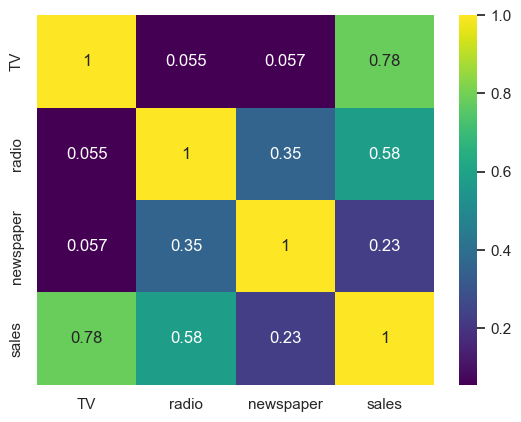

In [4]:
sns.heatmap(advertising.corr(), annot=True, cmap='viridis');

### Test istnienia relacji między predyktorami a zmienną celu

Sprawdzamy, czy istnieje relacja między **którymkolwiek** z predyktorów a zmienną celu. Rozważmy hipotezę zerową, że wszystkie współczynniki regresji są równe 0:

\begin{equation*}
H_0: \beta_1 = \beta_2 = \ldots = \beta_p = 0,
\end{equation*}

kontra hipotezę alternatywną, że przynajmniej jeden z nich jest różny od 0:

\begin{equation*}
H_1: \beta_j \neq 0 \text{ dla przynajmniej jednego } j.
\end{equation*}

Pomijamy $\beta_0$, gdyż ten parametr nie tworzy relacji między predyktorami a zmienną celu.

Statystyka wykorzystywana w tym teście to **statystyka $F$** (*F-statistic*), zdefiniowana jako

<div class="wzor">

\begin{equation*}
F = \frac{(\text{TSS} - \text{RSS})/p}{\text{RSS}/(n-p-1)},
\end{equation*}

</div>

gdzie $\text{TSS} = \sum_{i=1}^n (y_i - \bar{y})^2$ jest całkowitą sumą kwadratów a $\text{RSS} = \sum_{i=1}^n (y_i - \hat{y}_i)^2$ jest sumą kwadratów reszt. Pamiętamy, że $\text{RSS}$ jest miarą wariancji pozostałej w danych po zastosowaniu modelu, czyli wariancji, której model nie zdołał wyjaśnić. Z kolei $\text{TSS} - \text{RSS}$ jest miarą wariancji wyjaśnionej przez model. Stąd statystykę $F$ można interpretować jako

\begin{equation*}
F = \frac{\text{wariancja wyjaśniona przez model}}{\text{wariancja pozostała w danych po zastosowaniu modelu}}.
\end{equation*}

Bardziej formalnie, wiadomo, że jeśli założenia modelu liniowego są spełnione to

\begin{equation*}
\mathbb{E}(\text{RSS}/(n-p-1)) = \sigma^2,
\end{equation*}

a jeśli hipoteza zerowa jest prawdziwa, to

\begin{equation*}
\mathbb{E}((\text{TSS} - \text{RSS})/p) = \sigma^2.
\end{equation*}

Zatem jeśli hipoteza zerowa jest prawdziwa, to wartość statystyki $F$ powinna oscylować wokół 1. Jeśli natomiast hipoteza zerowa jest fałszywa, to wartość statystyki $F$ powinna być wyraźnie większa od 1. Zauważmy, że jeśli model został dopasowany metodą najmniejszych kwadratów, to zawsze $\text{RSS} \leqslant \text{TSS}$ (gdyż wtedy model wyjaśnia nie mniej niż zwykła średnia) i w konsekwencji $F \geqslant 0$.

Statystyka $F$ w regresji `sales` względem `TV`, `radio` i `newspaper`:

In [5]:
model = sm.OLS(advertising.loc[:, 'sales'], sm.add_constant(advertising.loc[:, 'TV radio newspaper'.split()]))
result = model.fit()
result.summary().tables[0]

Dep. Variable:,sales,R-squared:,0.897
Model:,OLS,Adj. R-squared:,0.896
Method:,Least Squares,F-statistic:,570.3
Date:,"Sun, 22 Oct 2023",Prob (F-statistic):,1.58e-96
Time:,22:41:55,Log-Likelihood:,-386.18
No. Observations:,200,AIC:,780.4
Df Residuals:,196,BIC:,793.6
Df Model:,3,,
Covariance Type:,nonrobust,,


Wartość $F$ wynosi 570.3, czyli jest bardzo duża. Z kolei $p$-wartość dla tej statystyki wynosi 1.58e-96, czyli jest ekstremalnie mała. Mamy zatem bardzo silną podstawę do odrzucenia hipotezy zerowej i przyjęcia hipotezy alternatywnej, że przynajmniej jeden z parametrów `TV`, `radio`, `newspaper` jest różny od 0. 

$p$-wartość w tym teście obliczana jest następująco. Jeśli hipoteza zerowa jest prawdziwa, to statystyka $F$ ma rozkład $F$-Snedecora z $p$ i $n-p-1$ stopniami swobody. Niech $F_{\text{score}}$ będzie wartością statystyki $F$ dla danych treningowych. Wówczas

\begin{equation*}
p = P(F>F_{\text{score}}|H_0) = P(F_{p, n-p-1} > F_{\text{score}}),
\end{equation*}

gdzie $F_{p, n-p-1}$ jest zmienną losową o rozkładzie $F$-Snedecora z $p$ i $n-p-1$ stopniami swobody. W Pythonie $p$-wartość w tym teście obliczymy za pomocą funkcji `scipy.stats.f.sf`. Symbol `sf` oznacza *survival function*, czyli funkcję prawdopodobieństwa dla zmiennej losowej $X$ zdefiniowaną jako $P(X>x)$ (dopełnienie dystrybuanty do 1).

#### Test zależności od podzbioru predyktorów

Powyżej sprawdzaliśmy, czy istnieje relacja między **którymkolwiek** z $p$ predyktorów a zmienną celu. Często interesuje nas jednak, czy istnieje relacja zmienną celu a **wybranym podzbiorem** predyktorów. Rozważmy następującą hipotezę zerową:

\begin{equation*}
H_0: \beta_{p-q+1} = \beta_{p-q+2} = \ldots = \beta_p = 0,
\end{equation*}

kontra hipoteza alternatywna:

\begin{equation*}
H_1: \beta_j \neq 0 \text{ dla przynajmniej jednego } j \in \{p-q+1, p-q+2, \ldots, p\}.
\end{equation*}

Przyjęliśmy tu dla wygody, że interesuje nas ostatnich $q$ predyktorów, ale w praktyce jest to oczywiście dowolny podzbiór predyktorów o liczności $q$.

Statystyka $F$ w tym teście ma postać:


<div class="wzor">

\begin{equation*}
F = \frac{(\text{RSS}_0 - \text{RSS})/q}{\text{RSS}/(n-p-1)}.
\end{equation*}

</div>

Symbolem $\text{RSS}_0$ oznaczamy sumę kwadratów reszt dla modelu, w którym uwzględniamy wszystkie poza **ostatnimi** $q$ predyktorami. Wówczas $\text{RSS}_0$ jest miarą wariancji pozostałej w danych po zastosowaniu modelu, w którym uwzględniamy wszystkie poza ostatnimi $q$ predyktorami. Z kolei $\text{RSS}$ jest miarą wariancji pozostałej w danych po zastosowaniu modelu, w którym uwzględniamy wszystkie $p$ predyktorów. Stąd statystykę $F$ można interpretować jako 

\begin{equation*}
F = \frac{\text{wariancja wyjaśniona przez model z wyłączeniem ostatnich } q \text{ predyktorów}}{\text{wariancja pozostała w danych po zastosowaniu modelu z wszystkimi predyktorami}}
\end{equation*}

Obliczmy statystykę $F$ dla testu, czy `newspaper` wnosi istotny wkład do modelu regresji `sales` względem `TV`, `radio` i `newspaper`:

In [6]:
model_TV_radio = sm.OLS(advertising.loc[:, 'sales'], sm.add_constant(advertising.loc[:, 'TV radio'.split()])).fit()
model_full = sm.OLS(advertising.loc[:, 'sales'], sm.add_constant(advertising.loc[:, 'TV radio newspaper'.split()])).fit()
RSS0 = model_TV_radio.ssr
RSS = model_full.ssr
F = ((RSS0 - RSS) / 1) / (RSS / (200 - 3 - 1))
F

0.031228045103150005

Odpowiadająca tej statystyce $p$-wartość:

In [7]:
stats.f.sf(F, 1, 200 - 3 - 1)

0.8599150500806343

Duża $p$-wartość każe podtrzymać hipotezę zerową, że `newspaper` nie wnosi istotnego wkładu do modelu regresji `sales` względem `TV`, `radio` i `newspaper`.

Zauważmy, że tak uzyskana wartość statystyki $F$ jest równa kwadratowi statystyki $t$ dla współczynnika regresji `newspaper` w modelu regresji `sales` względem `TV`, `radio` i `newspaper`:

In [8]:
F, model_full.tvalues.loc['newspaper']**2

(0.031228045103150005, 0.031228045103172633)

Równość ta nie jest przypadkiem. Test wykonywany za pomocą statystyki $F$ sprawdzający czy efekt dodania jednego predyktora do modelu regresji jest istotny statystycznie, jest równoważny testowi, czy współczynnik regresji tego predyktora jest różny od 0.

Warto zauważyć, że hipotezy zerowej, że wszystkie współczynniki regresji są równe 0 nie możemy obalić wykonując indywidualne testy dla każdego z $p$ predyktorów. Nawet gdyby któryś z takich testów dał istotny wynik, to nie możemy być pewni, że nie jest to efekt przypadku, zwłaszcza gdy $p$ jest duże. 

Oto przykład eksperymentalny. Generujemy ze standardowego rozkładu normalnego $p=100$ kolumn o $n=1000$ obserwacjach każda. W każdej kolumnie wartości są niezależne od siebie. Jako zmienną celu bierzemy $1000$ losowych wartości ze standardowego rozkładu normalnego. Wówczas każdy z $p$ predyktorów jest niezależny od zmiennej celu. Jednak jeśli wykonamy $p$ testów, to z prawdopodobieństwem $1-(1-0.05)^p$ przynajmniej jeden z nich da istotny wynik. Dla $p=100$ jest to prawdopodobieństwo $1-(1-0.05)^{100} = 0.994$, czyli bardzo bliskie 1. 

Generowanie danych:

In [9]:
n = 1000
p = 100

X = np.random.normal(size=(n, p))
y = np.random.normal(size=n)
model_full = sm.OLS(y, sm.add_constant(X)).fit()

Sprawdzenie ile predyktorów jest istotnych na podstawie indywidualnych testów $t$:

In [10]:
model_full.pvalues[model_full.pvalues < 0.05]

array([0.04274841])

Test hipotezy zerowej, że wszystkie współczynniki regresji są równe 0 (a wiemy, że są):

In [11]:
model_full.f_pvalue

0.9975724109887328

### Które predyktory są istotne?

Problem selekcji zmiennych (*feature selection* albo *variable selection*) polega na wskazaniu tych zmiennych objaśniających, które mają istotny wpływ na zmienną celu. Po stwierdzeniu za pomocą testu $F$, że istnieje relacja między zmienną celu a pewnymi spośród $p$ predyktorów, możemy chcieć zidentyfikować te predyktory, które są istotne za pomocą indywidualnych testów $t$. Poprawność tej metody spada niestety wraz ze wzrostem liczby predyktorów $p$: jak zasugerowaliśmy powyżej, gdy $p$ jest duże, to wzrasta prawdopodobieństwo błędnego uznania niektórych predyktorów za istotne z powodu czystego przypadku. 

Inne podejście polega na testowaniu wszystkich możliwych podzbiorów predyktorów. W przypadku $p$ predyktorów istnieje $2^p$ możliwych podzbiorów. Dla każdego z nich dopasowujemy model regresji a na koniec wybieramy najlepszy stosując jakąś miarę jakości modelu, np. skorygowany $R^2$, kryterium AIC, kryterium BIC lub jeszcze coś innego. Wadą tego podejścia jest to, że dla dużych $p$ liczba możliwych podzbiorów jest ogromna.

Jeśli nie jest możliwe przejrzenie wszystkich możliwych podzbiorów, to można zastosować jeden z klasycznych algorytmów przeszukiwania:

* *forward selection*: zaczynamy od modelu *zerowego* przewidującego średnią zmiennej celu. Następnie dodajemy do niego każdy z $p$ predyktorów i wybieramy ten, który daje najniższy $\text{RSS}$. Następnie dodajemy do modelu ten spośród pozostałych $p-1$ predyktorów, który daje najniższy $\text{RSS}$. Procedurę powtarzamy, aż do spełnienia pewnego kryterium stopu.
* *backward selection*: zaczynamy od modelu zawierającego wszystkie $p$ predyktorów. Następnie usuwamy z niego zmienną o największej $p$-wartości, czyli najmniej istotną. Procedurę powtarzamy, aż do spełnienia pewnego kryterium stopu.
* *mixed selection*: zaczynamy od modelu zerowego. Dodajemy do niego predyktory dające najlepsze dopasowanie, tak jak w *forward selection*. Wówczas $p$-wartości dla predyktorów w modelu mogą wzrastać. Gdy $p$-wartość dla któregoś z predyktorów przekroczy ustalony próg, to usuwamy ten predyktor z modelu. Procedurę powtarzamy, aż do spełnienia pewnego kryterium stopu.

### Jakość dopasowania

Dla modelu o $p$ predyktorach *resztowy błąd standardowy* (*residual standard error*) definiujemy jako

<div class="wzor">

\begin{equation*}
\text{RSE} = \sqrt{\frac{ \text{RSS}}{n-p-1}}.
\end{equation*}

</div>

Współczynnik determinacji $R^2$ definiujemy tak samo jak w przypadku regresji jednokrotnej:

<div class="wzor">

\begin{equation*}
R^2 = \frac{\text{TSS} - \text{RSS}}{\text{TSS}} = 1 - \frac{\text{RSS}}{\text{TSS}}.
\end{equation*}

</div>

Te dwie wielkości to podstawowe miary jakości dopasowania modelu regresji. 

Dla modelu `sales` względem `TV` współczynnik determinacji wynosi 0.61, a resztowy błąd standardowy 3.26:

In [12]:
result = sm.OLS(advertising.loc[:, 'sales'], sm.add_constant(advertising.loc[:, 'TV'])).fit()
result.rsquared, result.mse_resid**.5

(0.611875050850071, 3.2586563686504624)

Dodanie do modelu `radio` zmniejsza resztowy błąd standardowy do 1.68, a współczynnik determinacji wzrasta do 0.90:

In [13]:
result = sm.OLS(advertising.loc[:, 'sales'], sm.add_constant(advertising.loc[:, 'TV radio'.split()])).fit()
result.rsquared, result.mse_resid**.5

(0.8971942610828956, 1.681360912508001)

Natomiast dodanie do modelu `newspaper` nie wprowadza istotnej poprawy:

In [14]:
result = sm.OLS(advertising.loc[:, 'sales'], sm.add_constant(advertising.loc[:, 'TV radio newspaper'.split()])).fit()
result.rsquared, result.mse_resid**.5

(0.8972106381789521, 1.6855103734147443)

W rzeczywistości $\text{RSE}$ nawet nieznacznie wzrasta. Jest to spowodowane tym, że co prawda $\text{RSS}$ musi spaść po dodaniu nowego predyktora, ale w mianowniku $\text{RSE}$ mamy $n-p-1$ zależne od $p$, które powoduje zmianę w przeciwną stronę. 

### Jakość predykcji

Predykcja zaburzana jest przez trzy różne źródła błędów:

1. Stopień w jakim parametry $\hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_p$ odstają od prawdziwych parametrów $\beta_0, \beta_1, \ldots, \beta_p$. Jest to błąd *redukowalny*: możemy go zmniejszyć, gdy zwiększymy liczbę obserwacji $n$. Ten błąd decyduje o tym jak bardzo $\hat{y}$ może się różnić się prawdziwej wartości oczekiwanej $f(x)$ dla nowej obserwacji $x$. Dla oszacowania tej rozbieżności oblicza sie *przedział ufności* (*confidence interval*) dla $\hat{y}$.
2. Być może prawdziwa zależność $f$ między predyktorami a zmienną celu jest nieliniowa, podczas gdy my dopasowaliśmy model liniowy. Powstały w ten sposób błąd nazywamy *obciążeniem* (*bias*). Obciążenie jest również błędem *redukowalnym*: możemy je zmniejszyć dobierając bardziej adekwatny model. 
4. Nawet gdybyśmy znali prawdziwą zależność $f(X)$, to jeszcze pozostaje błąd losowy $\epsilon$ związany z postacią modelu $Y=f(X)+\varepsilon$. Błąd ten jest niemożliwy do usunięcia. Pokazuje on jak bardzo $\hat{y}$ może się różnić się od prawdziwej wartości $y$ dla nowej obserwacji $x$. Dla oszacowania tej rozbieżności wyznacza się *przedział predykcji* (*prediction interval*) dla $\hat{y}$.

Oba te przedziały są wyśrodkowane wokół wartości przewidywanej $\hat{y}$, ale różnią się długością: przedział predykcji jest zawsze dłuższy od przedziału ufności, gdyż poza błędem oszacowania wartości średniej $\hat{y}$ uwzględnia również błąd losowy $\epsilon$.

Średnia oraz przedziały ufności i predykcji dla modelu `sales` względem `TV` i `radio` dla nowej obserwacji `TV=100`, `radio=20`:

In [15]:
result = sm.OLS(advertising.loc[:, 'sales'], sm.add_constant(advertising.loc[:, 'TV radio'.split()])).fit()
predictions = result.get_prediction([1, 100, 20])
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,11.256466,0.137526,10.985254,11.527677,7.929616,14.583316
